# Read ImageJ CSV/XLS Files with Python

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filePath = "../../data/025um.xls"

## Read CSV with Numpy

Numpy is simple and returns unlabeled 2D arrays.

In [3]:
np.loadtxt(filePath, skiprows=1, delimiter="\t")

array([[1.000000e+00, 2.668748e+03, 2.639816e+03, ..., 1.155882e+03,
        4.087783e+03, 3.655584e+03],
       [2.000000e+00, 2.716716e+03, 2.638727e+03, ..., 1.058000e+03,
        4.072258e+03, 3.492112e+03],
       [3.000000e+00, 2.859796e+03, 2.598781e+03, ..., 1.057642e+03,
        4.048113e+03, 3.404697e+03],
       ...,
       [7.800000e+01, 6.807492e+03, 2.927428e+03, ..., 5.281280e+02,
        1.474402e+03, 2.248135e+03],
       [7.900000e+01, 6.711872e+03, 2.863155e+03, ..., 5.351230e+02,
        1.511165e+03, 2.151112e+03],
       [8.000000e+01, 5.846715e+03, 2.897756e+03, ..., 5.182510e+02,
        1.458804e+03, 2.259719e+03]])

## Read CSV with Pandas
Pandas is fancier and uses _data frames_ (2D arrays with labeled rows and columns)

In [4]:
pd.read_csv(filePath, delimiter="\t")

,Time,19528021.25um.C1,19528021.25um.C2,19528021.25um.C3,19528021.25um.C4,19528021.25um.C5,19528021.25um.C6,19528021.25um.C7,19528021.25um.C8,19528021.25um.C9,...,20214022.25um.C53,20214022.25um.C54,20214022.25um.C55,20214022.25um.C56,20214022.25um.C57,20214022.25um.C58,20214022.25um.C59,20214022.25um.C60,20214022.25um.C61,20214022.25um.C62
0,1,2668.748,2639.816,2985.501,2811.421,2008.448,2309.128,2367.821,3747.249,4129.493,...,1758.643,1602.221,1239.493,1131.603,1606.959,1406.424,2394.172,1155.882,4087.783,3655.584
1,2,2716.716,2638.727,2964.856,2786.872,2030.417,2351.791,2491.884,3756.399,4037.815,...,1679.411,1742.097,1176.793,1129.310,1333.528,1333.190,2338.268,1058.000,4072.258,3492.112
2,3,2859.796,2598.781,2988.146,2856.878,2054.258,2386.428,2556.108,3813.130,4115.574,...,1619.147,1515.053,1154.757,1131.052,1420.756,1309.886,2284.656,1057.642,4048.113,3404.697
3,4,2849.311,2536.017,2955.754,2835.997,2087.821,2443.236,2630.541,3830.953,3994.907,...,1610.225,1436.841,1150.414,1122.868,1419.122,1204.405,2142.955,1005.011,3935.443,3426.674
4,5,2844.623,2547.587,2939.385,2814.508,2033.328,2464.550,2676.358,3803.693,3956.227,...,1568.357,1555.858,1424.471,1024.724,1324.146,1212.323,2177.522,981.914,3641.227,3326.595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,6664.720,3003.810,3368.096,2987.345,2573.601,3359.966,4109.158,3881.060,3227.044,...,918.279,573.212,631.386,579.546,863.781,808.171,1015.057,557.840,1570.402,2244.775
76,77,6498.990,2968.270,3340.101,2932.744,2541.412,3383.010,4132.662,3843.621,3239.021,...,970.132,549.664,642.279,573.213,796.951,772.380,1073.624,537.160,1401.402,2254.663
77,78,6807.492,2927.428,3478.965,2867.070,2493.349,3352.608,4135.531,3855.365,3235.743,...,956.116,731.575,654.707,568.092,770.073,820.424,1029.510,528.128,1474.402,2248.135
78,79,6711.872,2863.155,3862.032,2786.421,2484.422,3324.538,4096.709,3822.957,3241.979,...,958.519,622.814,634.257,604.534,854.789,780.057,1079.694,535.123,1511.165,2151.112


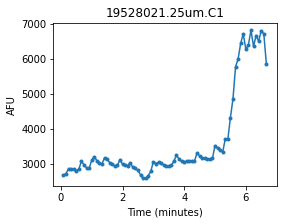

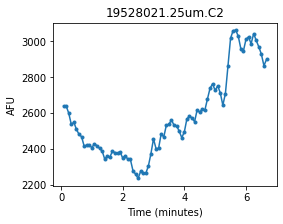

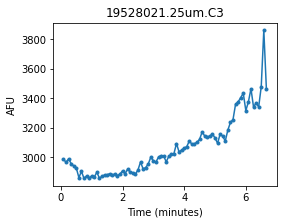

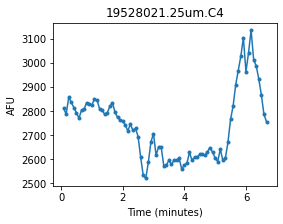

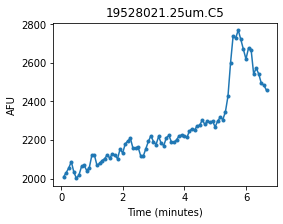

In [8]:
df = pd.read_csv(filePath, delimiter="\t")

# Correct times and convert units to minutes
framePeriodSeconds = 5.0
framesPerMinute = 60 / framePeriodSeconds
times = df['Time'].values / framesPerMinute

roiNames = df.columns[1:] # skip the first column (Time)
for roiName in roiNames[:5]: # plot the first 5 ROIs
    plt.figure(figsize=(4, 3))
    afu = df[roiName].values
    plt.plot(times, afu, '.-')
    plt.title(roiName)
    plt.xlabel("Time (minutes)")
    plt.ylabel("AFU")
    plt.show()
    plt.close()